In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('data/titanic3.csv')

In [2]:
data.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [3]:
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [4]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<Axes: xlabel='survived', ylabel='fare'>

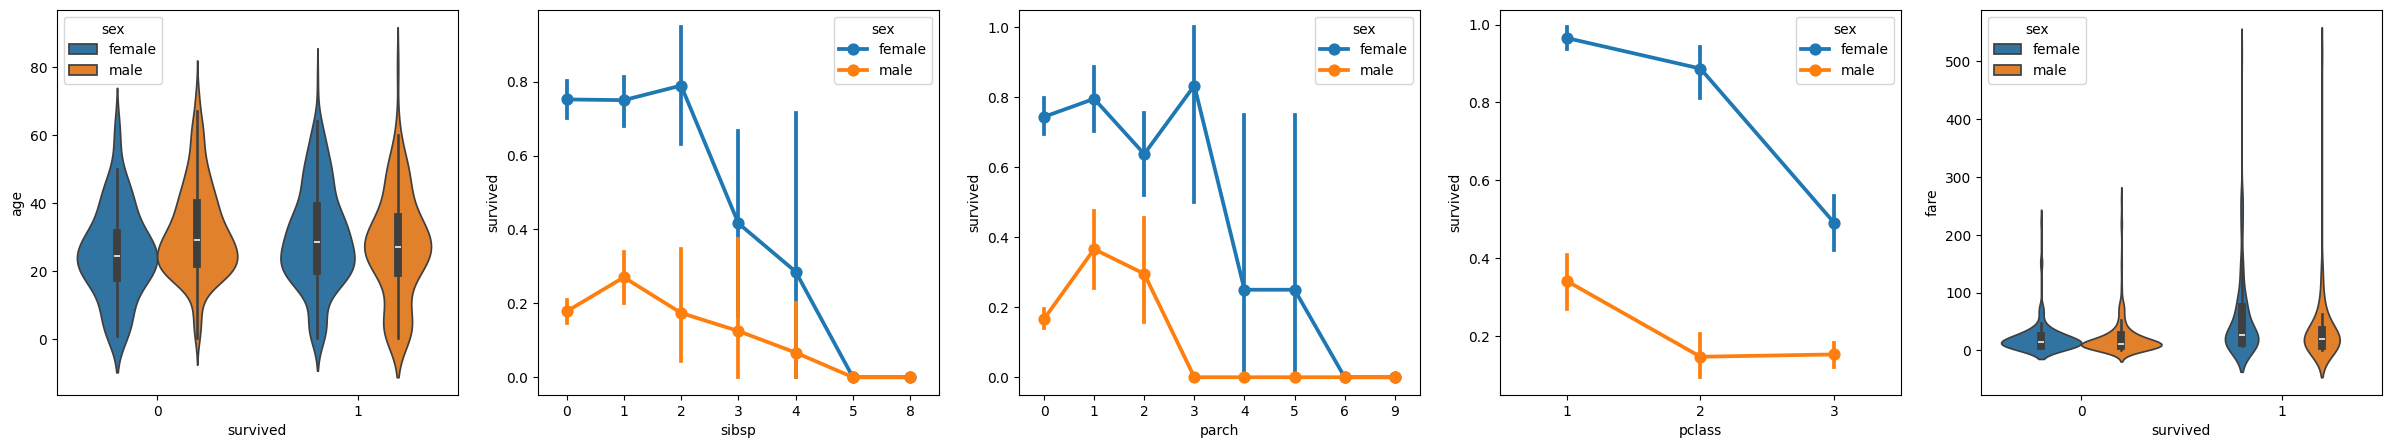

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])


In [6]:
data.replace({'male': 1, 'female': 0}, inplace=True)

/var/folders/4z/qjrn91vn35n8msqdc6t9tdrw0000gn/T/ipykernel_5778/2851430834.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'male': 1, 'female': 0}, inplace=True)


In [7]:
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [8]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [9]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [13]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))


0.7464114832535885


Use a neural network

In [14]:
from keras.models import Sequential
from keras.layers import Dense
import setuptools.dist

model = Sequential()

In [15]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

/Users/thanay/Documents/Academic/Projects/VSCode/hello_ds/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66 (264.00 B)

 Trainable params: 66 (264.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.5894 - loss: 0.6926
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.5677 - loss: 0.6906
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.5696 - loss: 0.6871
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.5920 - loss: 0.6794
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.6962 - loss: 0.6647
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.7283 - loss: 0.6461
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.7703 - loss: 0.6144
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.7663 - loss: 0.5881
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.7890 - loss: 0.5418
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.7703 - loss: 0.5373
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.7857 - loss: 0.5029
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step

In [18]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0.7751196172248804
